In [1]:
import numpy as np
import scipy as sc
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from opt_utils import *
from grad_utils import *
%matplotlib inline

# load data

In [2]:
data = np.load('simulation_data.npy')
latent = np.load('simulation_latent.npy')

# parameters

In [3]:
# # optimization parameters
# l_penalty = 1
# max_iter = 1000
# ths = 1e-12

# # vanilla PGD parameters
# step_size = 0.03

# # backtracking parameters
# step_init = 0.1
# max_back = 100
# a = 0.2
# b = 0.5

# L1 penalty

## Sub-gradient Descent

In [4]:
objective_gd, beta_gd = gd_l1(data = data, verbose = True)

initial objective value: 13028.394406
100-th GD, objective value: 10594.322645
200-th GD, objective value: 10594.253595
300-th GD, objective value: 10594.235349
400-th GD, objective value: 10594.227579
500-th GD, objective value: 10594.219918
600-th GD, objective value: 10594.216453
700-th GD, objective value: 10594.215399
800-th GD, objective value: 10594.213841
900-th GD, objective value: 10594.213530
1000-th GD, objective value: 10594.210447
1100-th GD, objective value: 10594.209473
1200-th GD, objective value: 10594.209376
1300-th GD, objective value: 10594.208962
1400-th GD, objective value: 10594.207754
1500-th GD, objective value: 10594.207247
1600-th GD, objective value: 10594.206313
1700-th GD, objective value: 10594.206801
1800-th GD, objective value: 10594.205819
1900-th GD, objective value: 10594.206828
2000-th GD, objective value: 10594.205504
2100-th GD, objective value: 10594.205797
2200-th GD, objective value: 10594.205663
2300-th GD, objective value: 10594.204845
2400-

19600-th GD, objective value: 10594.198366
19700-th GD, objective value: 10594.198217
19800-th GD, objective value: 10594.198213
19900-th GD, objective value: 10594.198270
20000-th GD, objective value: 10594.198257
20100-th GD, objective value: 10594.198167
20200-th GD, objective value: 10594.198323
20300-th GD, objective value: 10594.198187
20400-th GD, objective value: 10594.198259
20500-th GD, objective value: 10594.198179
20600-th GD, objective value: 10594.198186
20700-th GD, objective value: 10594.198183
20800-th GD, objective value: 10594.198246
20900-th GD, objective value: 10594.198210
21000-th GD, objective value: 10594.198259
21100-th GD, objective value: 10594.198182
21200-th GD, objective value: 10594.198111
21300-th GD, objective value: 10594.198180
21400-th GD, objective value: 10594.198243
21500-th GD, objective value: 10594.198237
21600-th GD, objective value: 10594.198109
21700-th GD, objective value: 10594.198118
21800-th GD, objective value: 10594.198196
21900-th GD

38700-th GD, objective value: 10594.197334
38800-th GD, objective value: 10594.197364
38900-th GD, objective value: 10594.197357
39000-th GD, objective value: 10594.197365
39100-th GD, objective value: 10594.197362
39200-th GD, objective value: 10594.197390
39300-th GD, objective value: 10594.197301
39400-th GD, objective value: 10594.197297
39500-th GD, objective value: 10594.197349
39600-th GD, objective value: 10594.197359
39700-th GD, objective value: 10594.197309
39800-th GD, objective value: 10594.197365
39900-th GD, objective value: 10594.197388
40000-th GD, objective value: 10594.197327
40100-th GD, objective value: 10594.197421
40200-th GD, objective value: 10594.197320
40300-th GD, objective value: 10594.197324
40400-th GD, objective value: 10594.197294
40500-th GD, objective value: 10594.197304
40600-th GD, objective value: 10594.197332
40700-th GD, objective value: 10594.197368
40800-th GD, objective value: 10594.197349
40900-th GD, objective value: 10594.197350
41000-th GD

## ADMM

In [3]:
objective_admm, objective_admm_b_l1, beta_admm = admm_l1(data = data,verbose = True,return_b_obj = True)

initial objective value: 13028.394406
1-th ADMM, objective value: 10655.837394
2-th ADMM, objective value: 10622.975036
3-th ADMM, objective value: 10606.075041
4-th ADMM, objective value: 10600.018126
5-th ADMM, objective value: 10597.535496
6-th ADMM, objective value: 10596.335806
7-th ADMM, objective value: 10595.710843
8-th ADMM, objective value: 10595.358631
9-th ADMM, objective value: 10595.140197
10-th ADMM, objective value: 10594.993232
11-th ADMM, objective value: 10594.883083
12-th ADMM, objective value: 10594.801931
13-th ADMM, objective value: 10594.728100
14-th ADMM, objective value: 10594.671788
15-th ADMM, objective value: 10594.617695
16-th ADMM, objective value: 10594.571461
17-th ADMM, objective value: 10594.531991
18-th ADMM, objective value: 10594.497802
19-th ADMM, objective value: 10594.467743
20-th ADMM, objective value: 10594.441019
21-th ADMM, objective value: 10594.417076
22-th ADMM, objective value: 10594.396734
23-th ADMM, objective value: 10594.378260
24-th

c:\python\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


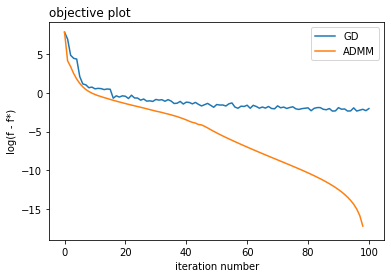

In [5]:
f = plt.figure(1, figsize = (6,4))
n_iter = len(objective_admm)

obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm)])
plt.plot(np.log(objective_gd - obj_opt)[:n_iter], label="GD")
plt.plot(np.log(objective_admm - obj_opt)[:n_iter], label="ADMM")

# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm_b_l1)])
# plt.plot(np.log(objective_gd - obj_opt)[:n_iter], label="GD")
# plt.plot(np.log(objective_admm_b_l1 - obj_opt)[:n_iter], label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l1.pdf", bbox_inches='tight')

c:\python\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


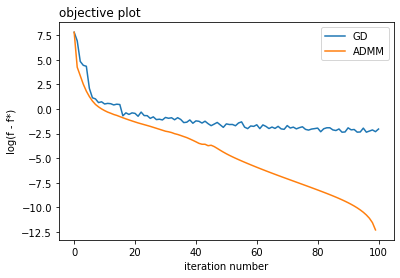

In [6]:
f = plt.figure(1, figsize = (6,4))
n_iter = len(objective_admm)

# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm)])
# plt.plot(np.log(objective_gd - obj_opt)[:n_iter], label="GD")
# plt.plot(np.log(objective_admm - obj_opt)[:n_iter], label="ADMM")

obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm_b_l1)])
plt.plot(np.log(objective_gd - obj_opt)[:n_iter], label="GD")
plt.plot(np.log(objective_admm_b_l1 - obj_opt)[:n_iter], label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l1.pdf", bbox_inches='tight')

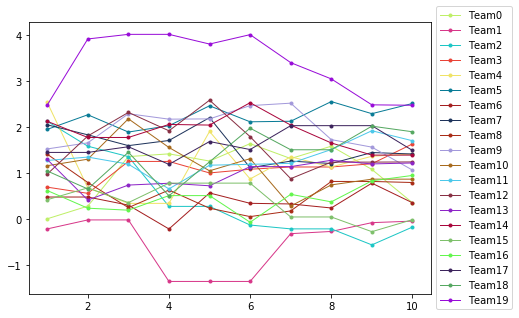

In [7]:
T, N = data.shape[0:2]
beta = beta_admm.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=np.random.rand(3,),marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
f.savefig("l1_solution.pdf", bbox_inches='tight')